In [1]:
library(mixtools)

mixtools package, version 1.1.0, Released 2017-03-10
This package is based upon work supported by the National Science Foundation under Grant No. SES-0518772.




In [2]:
data(NOdata)

In [3]:
head(NOdata)

,NO,Equivalence
,<dbl>,<dbl>
1,3.741,0.907
2,2.295,0.761
3,1.498,1.108
4,2.881,1.016
5,0.760,1.189
6,3.120,1.001


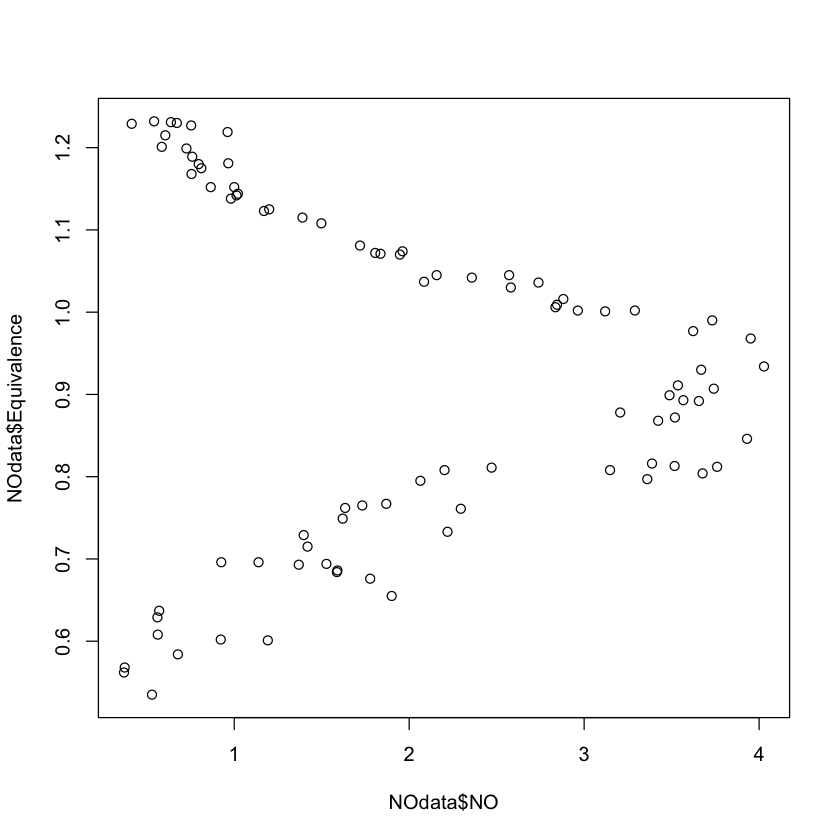

In [4]:
plot(NOdata$NO, NOdata$Equivalence)

In [37]:
set.seed(100)
res <- regmixEM(NOdata$NO, NOdata$Equivalence, epsilon = 1e-05, k=2)

number of iterations= 29 


In [38]:
res$beta

,comp.1,comp.2
beta.0,1.6325379,6.430678
beta.1,-0.4098083,-3.346647


In [41]:
res$beta[,1]

beta.0     beta.1 
 1.6325379 -0.4098083

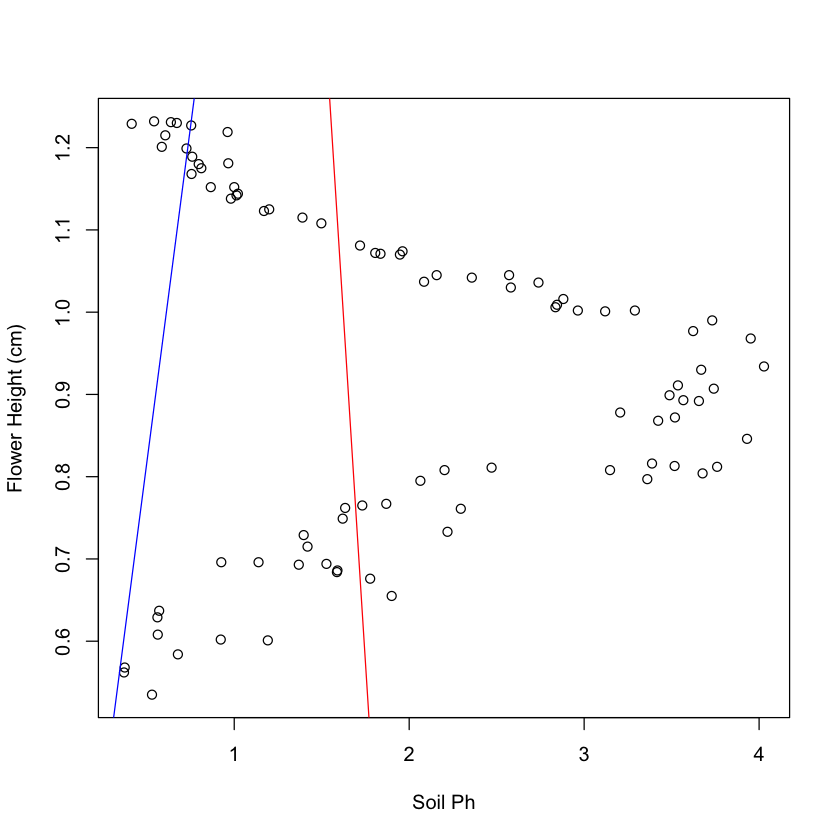

In [42]:
plot(NOdata$NO, NOdata$Equivalence, xlab = "Soil Ph", ylab = "Flower Height (cm)")
abline(x, y1, col = "blue") # plot the first fitted line
abline(res$beta[,2], col = "red") # plot the second fitted line

In [15]:
x = seq(0, 4, length=100)

In [28]:
#y1 = (1.6321872)*x -0.4089046
#y2 = (6.419560)*x +-3.333894

y1 = (-0.4089046)*x + 1.6321872
y2 = (-3.333894)*x +6.419560


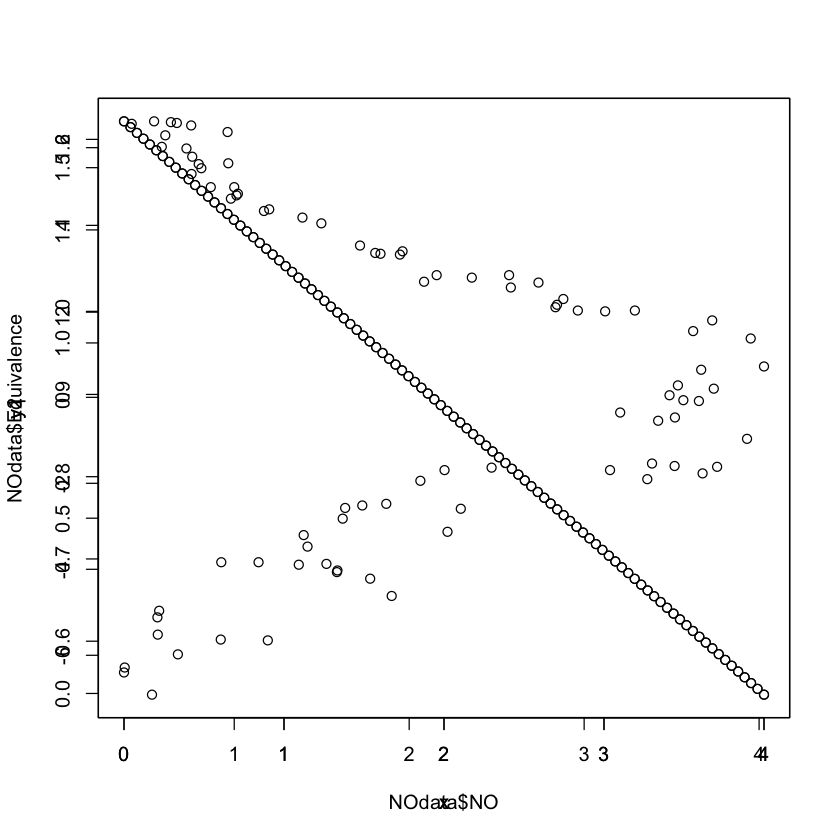

In [29]:
plot(NOdata$NO, NOdata$Equivalence)
par(new=T)
plot(x, y1)
par(new=T)       
plot(x, y2)

# 仮想データ  
- https://stats.stackexchange.com/questions/389545/what-if-my-linear-regression-data-contains-several-co-mingled-linear-relationshi

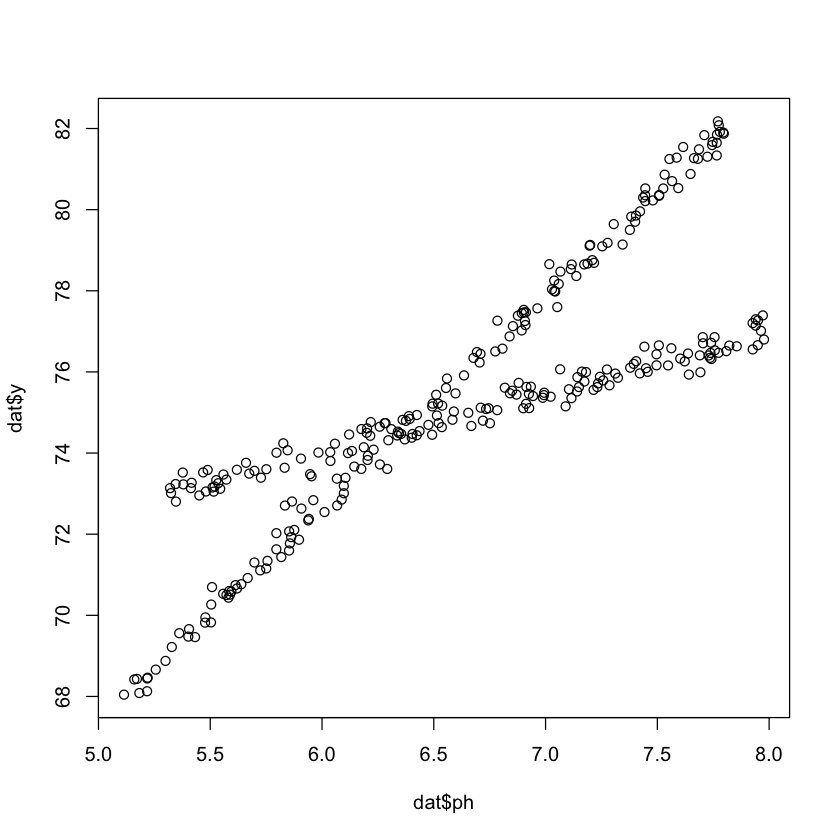

In [44]:
# Generate some fake data that looks kind of like yours
n1 <- 150
ph1 = runif(n1, 5.1, 7.8)
y1 <- 41.55 + 5.185*ph1 + rnorm(n1, 0, .25)

n2 <- 150
ph2 <- runif(n2, 5.3, 8)
y2 <- 65.14 + 1.48148*ph2 + rnorm(n2, 0, 0.25)

# There are definitely better ways to do all of this but oh well
dat <- data.frame(ph = c(ph1, ph2), 
                  y = c(y1, y2), 
                  group = rep(c(1,2), times = c(n1, n2)))

# Looks about right
plot(dat$ph, dat$y)

In [45]:
# Fit the regression. One line for each component. This defaults
# to assuming there are two underlying groups/components in the data
out <- regmixEM(y = dat$y, x = dat$ph, addintercept = T)

number of iterations= 19 


In [46]:
summary(out)

summary of regmixEM object:
          comp 1    comp 2
lambda  0.504534  0.495466
sigma   0.254048  0.234722
beta1  41.591669 65.213417
beta2   5.180583  1.469350
loglik at estimate:  -191.8229 


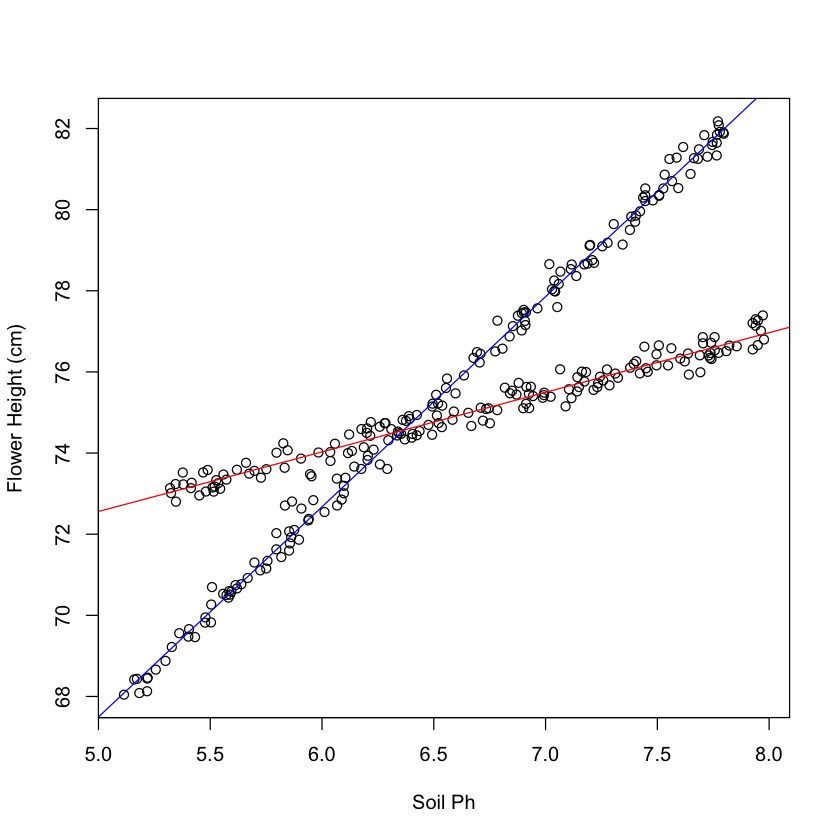

In [47]:
plot(dat$ph, dat$y, xlab = "Soil Ph", ylab = "Flower Height (cm)")
abline(out$beta[,1], col = "blue") # plot the first fitted line
abline(out$beta[,2], col = "red") # plot the second fitted line

In [49]:
out$posterior

comp.1,comp.2
1.0000000,4.124546e-33
1.0000000,1.884147e-09
0.9999999,1.254963e-07
1.0000000,3.122781e-29
1.0000000,2.649994e-91
0.9877815,1.221849e-02
1.0000000,4.836671e-89
0.5288970,4.711030e-01
1.0000000,1.179330e-41
1.0000000,8.879780e-96


In [50]:
dat

ph,y,group
<dbl>,<dbl>,<dbl>
7.113007,78.53384,1
6.011143,72.54579,1
6.775091,76.50521,1
7.038542,78.25221,1
7.663987,81.26914,1
5.834268,72.70610,1
7.723883,81.30503,1
6.375500,74.79335,1
7.253591,79.09573,1
